<h1>YOLO v3 - Implementation</h1>

<h3>This kernel is just a mere demonstration of the YOLO implementation with trained weights using PyTorch ! </h3>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
 !git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 724, done.
remote: Total 724 (delta 0), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (724/724), 16.17 MiB | 0 bytes/s, done.
Resolving deltas: 100% (422/422), done.


In [2]:
!cd PyTorch-YOLOv3/

In [19]:
!ls -la
!pwd

total 20
drwxr-xr-x  4 root root 4096 Oct 20 14:47 .
drwxr-xr-x  6 root root 4096 Oct 20 14:46 ..
drwxr-xr-x  2 root root 4096 Oct 20 14:46 .ipynb_checkpoints
drwxr-xr-x 10 root root 4096 Oct 20 15:02 PyTorch-YOLOv3
-rw-r--r--  1 root root  199 Oct 20 14:46 __notebook_source__.ipynb
/kaggle/working


In [7]:
!cd PyTorch-YOLOv3 && pip install -r requirements.txt

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15354 sha256=b5767fc79ec2fc65db6731b8f373e144c72b4e76a5809a82fc5a51b1dde05ad5
  Stored in directory: /tmp/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


In [10]:
!cd PyTorch-YOLOv3/weights && bash download_weights.sh

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
--2019-10-20 14:51:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.13MB/s    in 48s     

2019-10-20 14:52:24 (4.95 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
--2019-10-20 14:52:24--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weigh

In [11]:
# very large file only download it when you are going to train the model
!cd PyTorch-YOLOv3/data && bash get_coco_dataset.sh

Cloning into 'coco'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 0 bytes/s, done.
Resolving deltas: 100% (570/570), done.
wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
--2019-10-20 14:56:31--  https://pjreddie.com/media/files/train2014.zip
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510435630 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip         1%[                    ] 213.87M  1.82MB/s    eta 49m 14s^C


In [12]:
!cd PyTorch-YOLOv3 && python detect.py --image_folder data/samples/

Namespace(batch_size=1, checkpoint_model=None, class_path='data/coco.names', conf_thres=0.8, image_folder='data/samples/', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:01.059702
	+ Batch 1, Inference Time: 0:00:00.817320
	+ Batch 2, Inference Time: 0:00:00.780878
	+ Batch 3, Inference Time: 0:00:00.807870
	+ Batch 4, Inference Time: 0:00:00.778176
	+ Batch 5, Inference Time: 0:00:00.818923
	+ Batch 6, Inference Time: 0:00:00.771528
	+ Batch 7, Inference Time: 0:00:00.784399
	+ Batch 8, Inference Time: 0:00:00.782828

Saving images:
(0) Image: 'data/samples/dog.jpg'
	+ Label: dog, Conf: 0.99335
	+ Label: bicycle, Conf: 0.99981
	+ Label: truck, Conf: 0.94229
(1) Image: 'data/samples/eagle.jpg'
	+ Label: bird, Conf: 0.99703
(2) Image: 'data/samples/field.jpg'
	+ Label: person, Conf: 0.99996
	+ Label: horse, Conf: 0.99977
	+ Label: dog, Conf: 0.99409
(3) Image: 'dat

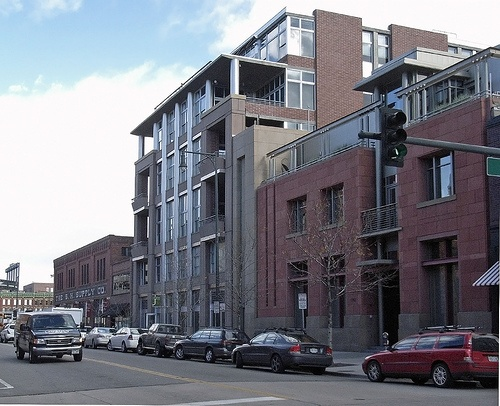

In [22]:
import pathlib
import imageio
from IPython.display import Image

training_paths = pathlib.Path('../PyTorch-YOLOv3').glob('*/data/samples/*.jpg')
training_sorted = sorted([x for x in training_paths])

#print(training_sorted)

Image("/kaggle/working/PyTorch-YOLOv3/data/samples/street.jpg")

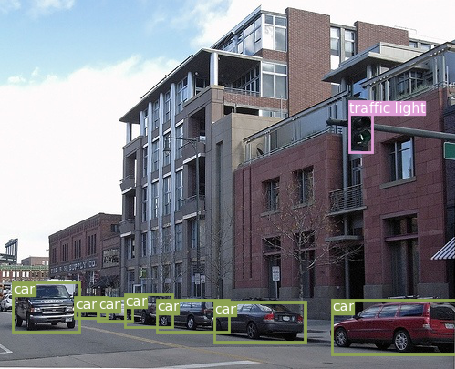

In [25]:
Image("/kaggle/working/PyTorch-YOLOv3/output/street.png")